Epoch [1/50], Loss: 23.0461, Accuracy: 63.66%
Epoch [2/50], Loss: 19.3422, Accuracy: 66.44%
Epoch [3/50], Loss: 26.2281, Accuracy: 64.81%
Epoch [4/50], Loss: 19.6792, Accuracy: 66.20%
Epoch [5/50], Loss: 17.9657, Accuracy: 66.67%
Epoch [6/50], Loss: 17.2122, Accuracy: 66.20%
Epoch [7/50], Loss: 17.6011, Accuracy: 65.97%
Epoch [8/50], Loss: 17.0369, Accuracy: 66.67%
Epoch [9/50], Loss: 16.7319, Accuracy: 66.44%
Epoch [10/50], Loss: 16.5879, Accuracy: 66.20%
Epoch [11/50], Loss: 16.2588, Accuracy: 66.20%
Epoch [12/50], Loss: 15.7220, Accuracy: 66.44%
Epoch [13/50], Loss: 14.9979, Accuracy: 72.45%
Epoch [14/50], Loss: 16.3391, Accuracy: 74.54%
Epoch [15/50], Loss: 13.4367, Accuracy: 75.46%
Epoch [16/50], Loss: 13.3915, Accuracy: 75.46%
Epoch [17/50], Loss: 12.6532, Accuracy: 78.70%
Epoch [18/50], Loss: 11.5865, Accuracy: 79.17%
Epoch [19/50], Loss: 11.6133, Accuracy: 79.63%
Epoch [20/50], Loss: 11.1869, Accuracy: 79.17%
Epoch [21/50], Loss: 18.2833, Accuracy: 78.94%
Epoch [22/50], Loss: 1

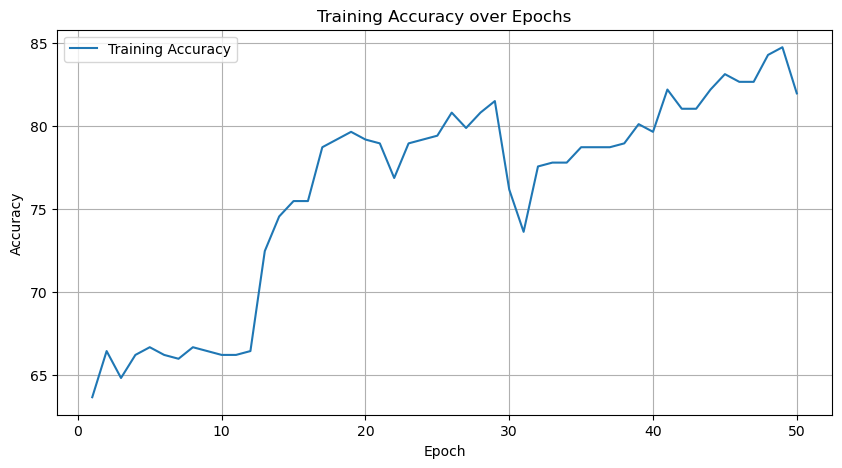

Test Accuracy: 88.07%
Test Accuracy: 0.8807
Precision: 0.8800
Recall: 0.6875
F1 Score: 0.7719
Model saved as 'PCOS_FFNN_model.pth'.


In [1]:
import torch
import pandas as pd
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("PCOS_EHR.csv", delimiter=";")
# Drops the first two columns
df = df.iloc[:, 2:]  
# Drops the last column
df = df.iloc[:, :-1]
df.replace({",": ".", r"\.+$": ""}, regex=True, inplace=True)
# Identify and clean non-numeric values
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN
df = df.fillna(0)  # Replace NaN with 0 or another value
# Rename columns for consistency
df= df.rename(columns = {
    "PCOS (Y/N)": "PCOS",
    " Age (yrs)": "Age",
    "Weight (Kg)": "Weight",
    "Height(Cm) ": "Height",
    "BMI": "BMI",
    "Blood Group": "Blood_Group",
    "Pulse rate(bpm) ": "Pulse_Rate",
    "RR (breaths/min)": "Respiratory_Rate",
    "Hb(g/dl)": "Hemoglobin",
    "Cycle(R/I)": "Cycle_Type",
    "Cycle length(days)": "Cycle_Length",
    "Marraige Status (Yrs)": "Marriage_Years",
    "Pregnant(Y/N)": "Pregnant",
    "No. of aborptions": "Num_Abortions",
    "  I   beta-HCG(mIU/mL)": "Beta_HCG_I",
    "II    beta-HCG(mIU/mL)": "Beta_HCG_II",
    "FSH(mIU/mL)": "FSH",
    "LH(mIU/mL)": "LH",
    "FSH/LH": "FSH_LH_Ratio",
    "Hip(inch)": "Hip_Size",
    "Waist(inch)": "Waist_Size",
    "Waist:Hip Ratio": "Waist_Hip_Ratio",
    "TSH (mIU/L)": "TSH",
    "AMH(ng/mL)": "AMH",
    "PRL(ng/mL)": "Prolactin",
    "Vit D3 (ng/mL)": "Vitamin_D3",
    "PRG(ng/mL)": "Progesterone",
    "RBS(mg/dl)": "Random_Blood_Sugar",
    "Weight gain(Y/N)": "Weight_Gain",
    "hair growth(Y/N)": "Excess_Hair",
    "Skin darkening (Y/N)": "Skin_Darkening",
    "Hair loss(Y/N)": "Hair_Loss",
    "Pimples(Y/N)": "Acne",
    "Fast food (Y/N)": "Fast_Food",
    "Reg.Exercise(Y/N)": "Exercise",
    "BP _Systolic (mmHg)": "BP_Systolic",
    "BP _Diastolic (mmHg)": "BP_Diastolic",
    "Follicle No. (L)": "Follicle_Num_L",
    "Follicle No. (R)": "Follicle_Num_R",
    "Avg. F size (L) (mm)": "Avg_Follicle_Size_L",
    "Avg. F size (R) (mm)": "Avg_Follicle_Size_R",
    "Endometrium (mm)": "Endometrium_Thickness"
})


blood_group_mapping = {
    "A+": 11, "A-": 12, "B+": 13, "B-": 14, 
    "O+": 15, "O-": 16, "AB+": 17, "AB-": 18
}

scaler = MinMaxScaler()
df[["Age", "Weight", "Height", "BMI", "Cycle_Length", "Marriage_Years",
    "FSH", "LH", "FSH_LH_Ratio", "Hip_Size", "Waist_Size", "Waist_Hip_Ratio",
    "TSH", "AMH", "Prolactin", "Vitamin_D3", "Progesterone", "Random_Blood_Sugar",
    "BP_Systolic", "BP_Diastolic", "Follicle_Num_L", "Follicle_Num_R",
    "Avg_Follicle_Size_L", "Avg_Follicle_Size_R", "Endometrium_Thickness"]] = \
    scaler.fit_transform(df[["Age", "Weight", "Height", "BMI", "Cycle_Length", "Marriage_Years",
                             "FSH", "LH", "FSH_LH_Ratio", "Hip_Size", "Waist_Size", "Waist_Hip_Ratio",
                             "TSH", "AMH", "Prolactin", "Vitamin_D3", "Progesterone", "Random_Blood_Sugar",
                             "BP_Systolic", "BP_Diastolic", "Follicle_Num_L", "Follicle_Num_R",
                             "Avg_Follicle_Size_L", "Avg_Follicle_Size_R", "Endometrium_Thickness"]])

# Convert categorical variables to integers
categorical_cols = ["PCOS", "Blood_Group", "Pulse_Rate", "Respiratory_Rate",
                    "Cycle_Type", "Pregnant", "Num_Abortions", "Beta_HCG_I", "Beta_HCG_II",
                    "Weight_Gain", "Excess_Hair", "Skin_Darkening", "Hair_Loss", 
                    "Acne", "Fast_Food", "Exercise"]

df[categorical_cols] = df[categorical_cols].astype(int)



df.head()

target_column = "PCOS"
X = df.drop(columns=[target_column]).values
y = df[target_column].values

# Convert labels to tensor
y = torch.tensor(y, dtype=torch.float32)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = y_train.view(-1, 1)  # Reshape to match output layer
y_test_tensor = y_test.view(-1, 1)

# Create PyTorch Dataset & DataLoader
class PCOSDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

train_dataset = PCOSDataset(X_train_tensor, y_train_tensor)
test_dataset = PCOSDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define Feedforward Neural Network
class PCOSNN(nn.Module):
    def __init__(self, input_size):
        super(PCOSNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))
        return x

# Initialize model
input_size = X_train.shape[1]
model = PCOSNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store accuracy and loss values
train_accuracy_list = []
train_loss_list = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    accuracy = 100 * correct / total
    train_accuracy_list.append(accuracy)
    train_loss_list.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model
model.eval()
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=1)
recall = recall_score(y_true, y_pred, zero_division=1)
f1 = f1_score(y_true, y_pred, zero_division=1)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Save trained model
torch.save(model.state_dict(), "PCOS_FFNN_model.pth")
print("Model saved as 'PCOS_FFNN_model.pth'.")